In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.tree import plot_tree

In [2]:
# Load the uploaded Excel file
file_path = '/content/heart_disease.xlsx'
data = pd.ExcelFile(file_path)


In [3]:
# Displaying the sheet names to understand the structure of the file
data.sheet_names

['Description', 'Heart_disease']

In [5]:
# Loading the dataset from the required sheet
heartDisease_data = data.parse('Heart_disease')


In [6]:
# Display the first few rows of the dataset to understand its structure
heartDisease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


#################Exploratory Data Analysis (EDA)#######################

In [7]:
#Display the structure of the dataset
dataInfo = heartDisease_data.info()
data_description = heartDisease_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
#Check for missing values
missing_values = heartDisease_data.isnull().sum()

In [9]:
#Check for outliers and inconsistencies (basic statistical overview)
outliers_summary = heartDisease_data.describe()

In [10]:
#Output the findings
dataInfo, data_description, missing_values


(None,
               age    trestbps        chol      thalch     oldpeak         num
 count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
 mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
 std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
 min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
 25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
 50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
 75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
 max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000,
 age          0
 sex          0
 cp           0
 trestbps     0
 chol         0
 fbs          0
 restecg      0
 thalch       0
 exang        0
 oldpeak     62
 slope        0
 thal         0
 num          0
 dtype: int64)

In [11]:
sns.set(style="whitegrid")

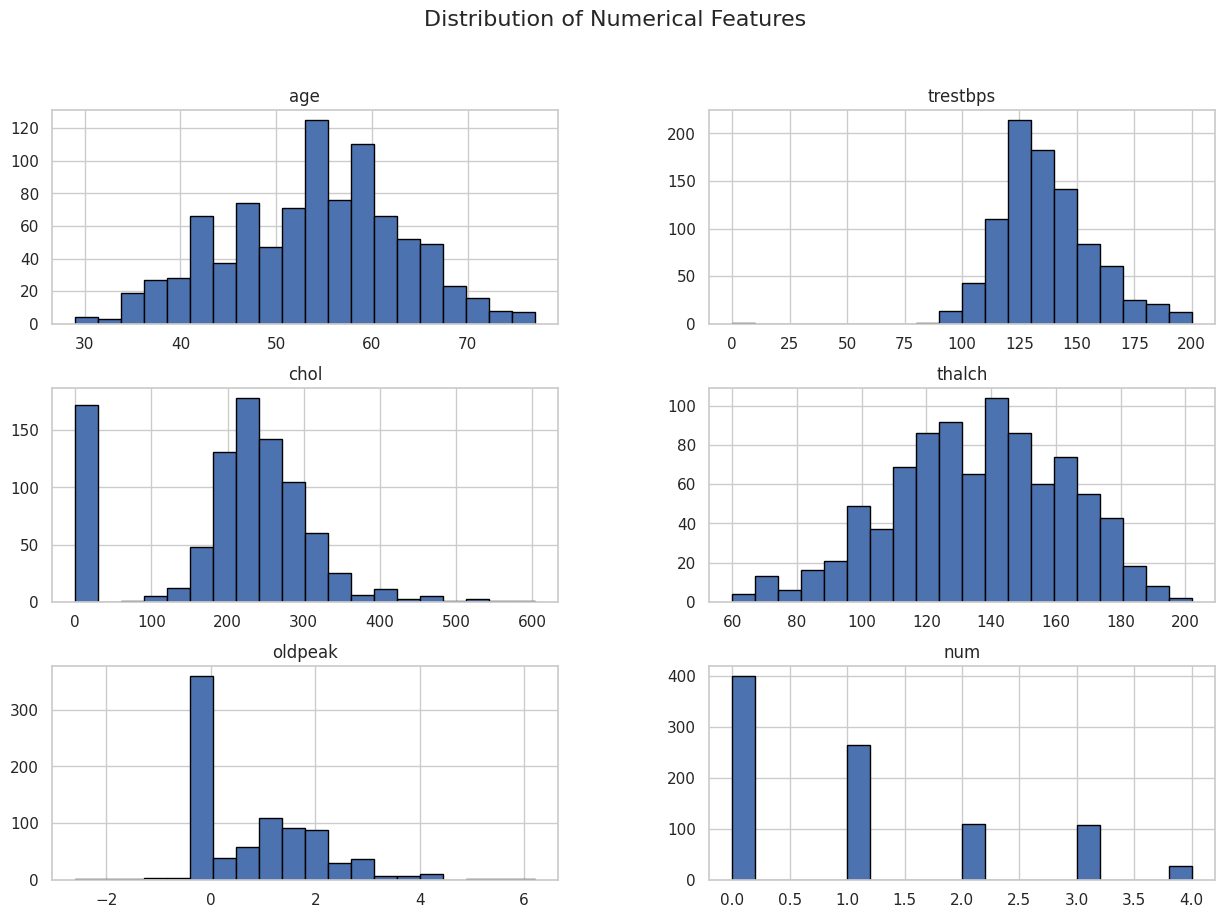

In [12]:
#Visualize histograms for numerical features
heartDisease_data.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


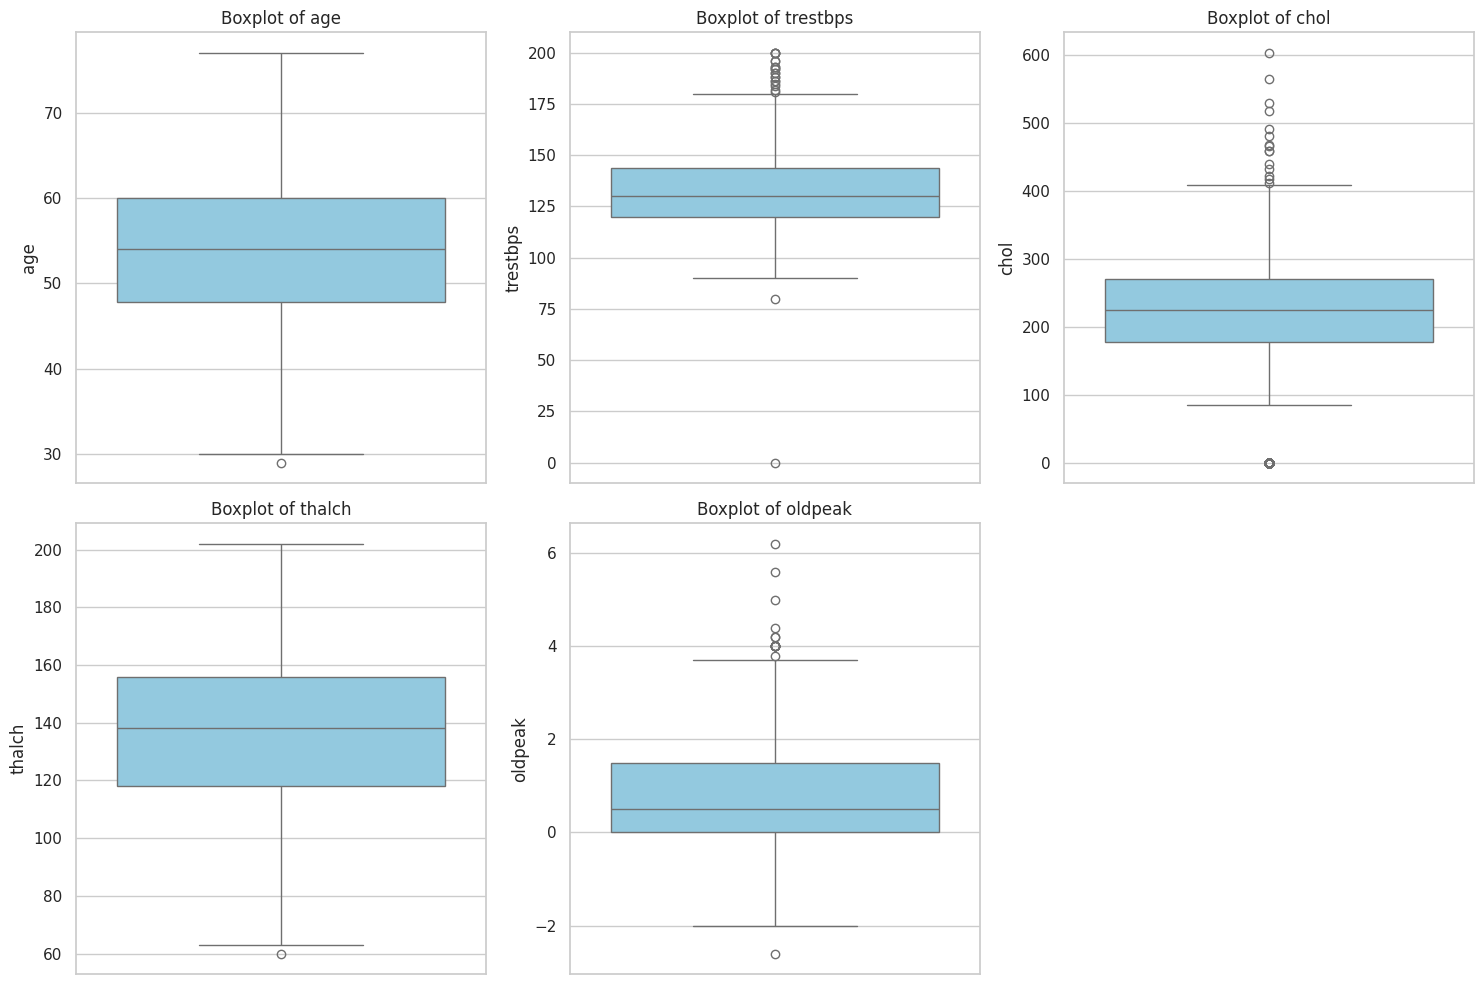

In [13]:
#Visualize box plots for numerical features to check for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(['age', 'trestbps', 'chol', 'thalch', 'oldpeak']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=heart_disease_data, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


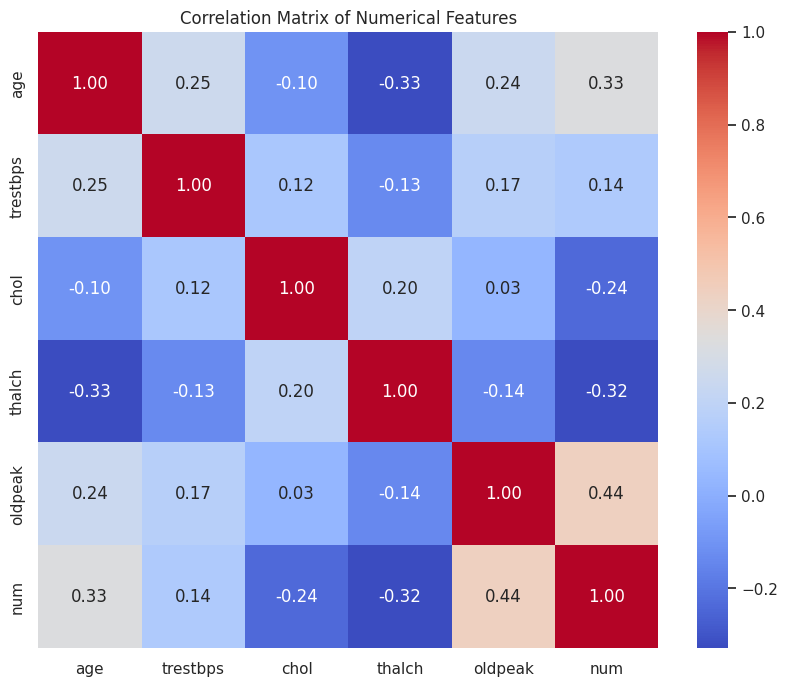

In [14]:
#Generate a correlation heatmap for numerical features
numerical_features = heartDisease_data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
correlation_matrix = heartDisease_data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


################# Feature Engineering #######################

In [15]:
# Handle Missing Values
# Replace missing values in 'oldpeak' with the median (common in numerical feature imputation)
heartDisease_data['oldpeak'].fillna(heartDisease_data['oldpeak'].median(), inplace=True)


<ipython-input-15-ca2be400fdd3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heartDisease_data['oldpeak'].fillna(heartDisease_data['oldpeak'].median(), inplace=True)


In [16]:
# Encode Categorical Variables
# Identify categorical columns
categorical_columns = heartDisease_data.select_dtypes(include=['object', 'bool']).columns


In [18]:
# Convert all categorical columns to string type to ensure compatibility with LabelEncoder
heartDisease_data[categorical_columns] = heartDisease_data[categorical_columns].astype(str)


In [19]:
# Apply Label Encoding to each categorical column
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    heartDisease_data[col] = le.fit_transform(heartDisease_data[col])
    label_encoders[col] = le  # Save the encoder for potential inverse transformations


In [20]:
# Scale Numerical Features
# Identify numerical columns
numerical_columns = heartDisease_data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = heartDisease_data.select_dtypes(include=['int64', 'float64']).drop(columns=['num']).columns


In [21]:
# Apply Standard Scaling to numerical columns
scaler = StandardScaler()
heartDisease_data[numerical_columns] = scaler.fit_transform(heartDisease_data[numerical_columns])


In [22]:
# Display the processed dataset's first few rows to confirm the changes
heartDisease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006027,0.514416,2.320276,0.567394,0.281297,1.976894,-1.561352,0.524183,-0.774285,1.354403,-1.672770,-1.615852,0
1,-1.397560,0.514416,0.232258,0.076967,0.013526,-0.505844,0.013879,-0.147705,-0.774285,-0.815718,-0.224843,-1.615852,0
2,0.350503,0.514416,-0.811752,0.322181,-0.084656,-0.505844,0.013879,0.449529,-0.774285,-0.438305,-0.224843,-1.615852,0
3,-0.195767,0.514416,2.320276,-0.756760,-0.138211,-0.505844,-1.561352,2.017268,-0.774285,-0.815718,-0.224843,-1.615852,0
4,0.350503,0.514416,-0.811752,-1.149102,-0.004325,-0.505844,0.013879,-0.371668,1.260594,0.599578,-0.224843,-1.615852,0


################# Decision Tree Classification: #######################

In [30]:
heartDisease_data.rename({'num': 'target'}, inplace=True)
X = heartDisease_data.drop(columns=['num'])
y = heartDisease_data['num']


In [31]:
# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Implement Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [33]:
# Make a predictions
y_pred = dt_classifier.predict(X_test)


In [35]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(pd.get_dummies(y_test), dt_classifier.predict_proba(X_test), multi_class='ovr')



In [36]:
classification_report_result = classification_report(y_test, y_pred)

accuracy, precision, recall, f1, roc_auc, classification_report_result


(0.5384615384615384,
 0.5291762704567291,
 0.5384615384615384,
 0.5336155900249993,
 0.6096350746080619,
 '              precision    recall  f1-score   support\n\n           0       0.74      0.75      0.74        89\n           1       0.39      0.38      0.38        48\n           2       0.42      0.45      0.43        22\n           3       0.17      0.18      0.17        17\n           4       0.00      0.00      0.00         6\n\n    accuracy                           0.54       182\n   macro avg       0.34      0.35      0.35       182\nweighted avg       0.53      0.54      0.53       182\n')

In [37]:
### Observations:
#- Class imbalance might be affecting performance, as some classes have very few samples

### Recommendations:
#- Address class imbalance using techniques like SMOTE or class weighting.

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV


In [38]:
# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [39]:
################# Implement Decision Tree Classifier with Hyperparameter Tuning################
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_resampled, y_resampled)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_weighted')

In [40]:
# Best model from grid search
best_dt_model = grid_search.best_estimator_


In [41]:
# Evaluate the optimized model
y_pred_optimized = best_dt_model.predict(X_test)
y_pred_proba_optimized = best_dt_model.predict_proba(X_test)


In [44]:
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized, average='weighted')
recall_optimized = recall_score(y_test, y_pred_optimized, average='weighted')
f1_optimized = f1_score(y_test, y_pred_optimized, average='weighted')
roc_auc_optimized = roc_auc_score(pd.get_dummies(y_test), y_pred_proba_optimized, multi_class='ovr')


In [45]:
classification_report_optimized = classification_report(y_test, y_pred_optimized)
grid_search.best_params_, accuracy_optimized, precision_optimized, recall_optimized, f1_optimized, roc_auc_optimized, classification_report_optimized


({'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2},
 0.5,
 0.49204510710239036,
 0.5,
 0.4936611187196668,
 0.5774826269853506,
 '              precision    recall  f1-score   support\n\n           0       0.72      0.76      0.74        89\n           1       0.31      0.31      0.31        48\n           2       0.31      0.18      0.23        22\n           3       0.20      0.24      0.22        17\n           4       0.00      0.00      0.00         6\n\n    accuracy                           0.50       182\n   macro avg       0.31      0.30      0.30       182\nweighted avg       0.49      0.50      0.49       182\n')

##################### Model Evaluation and Analysis ##########################

In [46]:
# Separate target variable and scale numerical features
target = heartDisease_data['num']
numerical_columns = heartDisease_data.select_dtypes(include=['int64', 'float64']).drop(columns=['num']).columns
scaler = StandardScaler()
heartDisease_data[numerical_columns] = scaler.fit_transform(heartDisease_data[numerical_columns])


In [47]:
X = heartDisease_data.drop('num', axis=1)
y = target


In [48]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
# Train Decision Tree Model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [50]:
# Predictions and Evaluation
y_pred = dt_classifier.predict(X_test)


In [51]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_report_result = classification_report(y_test, y_pred)


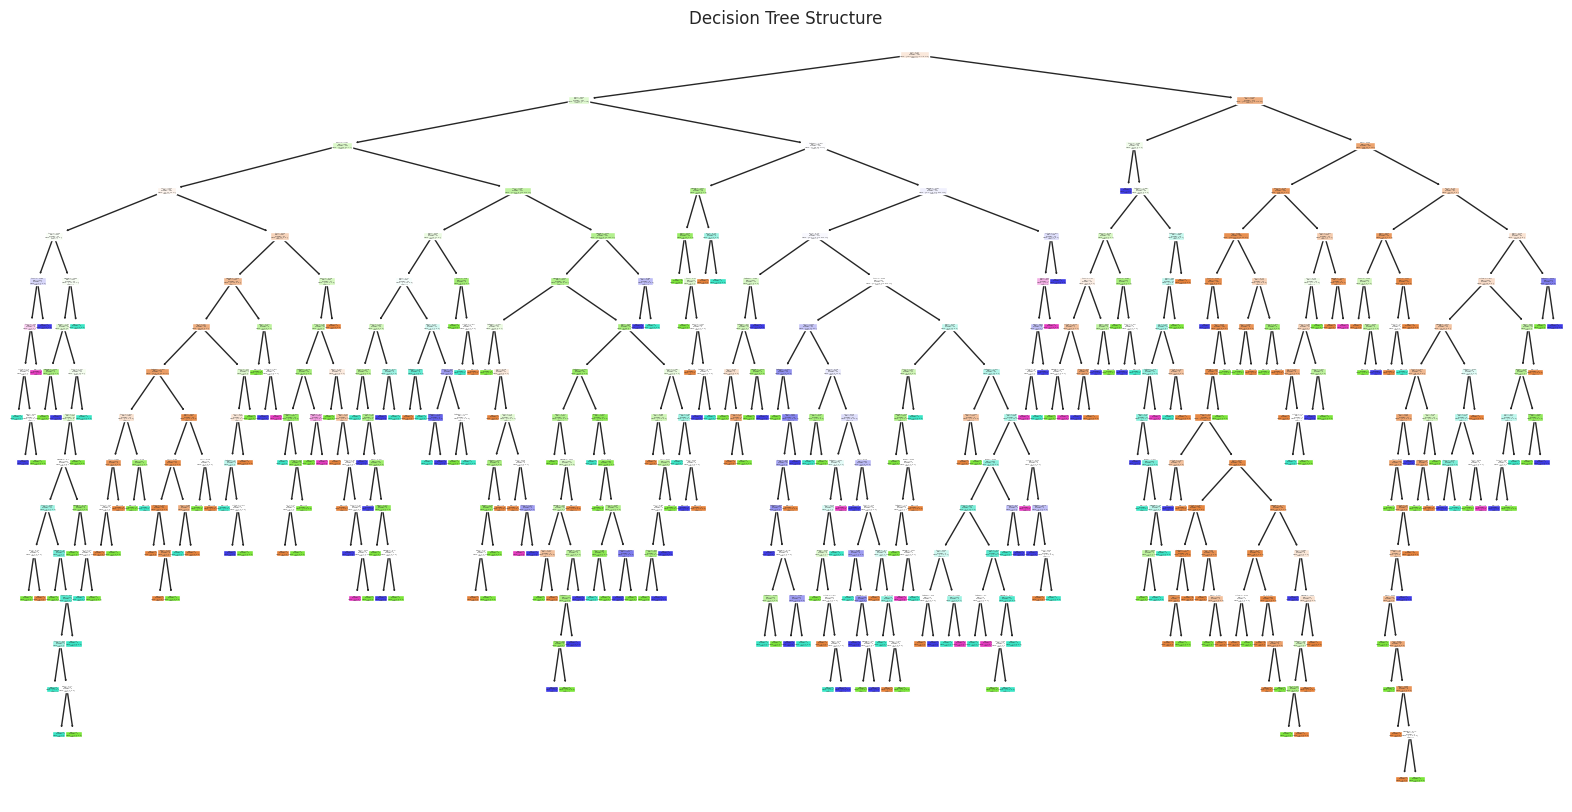

In [52]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=[str(cls) for cls in dt_classifier.classes_], filled=True)
plt.title("Decision Tree Structure")
plt.show()


In [53]:
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)


In [54]:
classification_report_result, feature_importances


('              precision    recall  f1-score   support\n\n           0       0.74      0.75      0.74        89\n           1       0.39      0.38      0.38        48\n           2       0.42      0.45      0.43        22\n           3       0.17      0.18      0.17        17\n           4       0.00      0.00      0.00         6\n\n    accuracy                           0.54       182\n   macro avg       0.34      0.35      0.35       182\nweighted avg       0.53      0.54      0.53       182\n',
      Feature  Importance
 7     thalch    0.180367
 4       chol    0.151559
 0        age    0.134611
 2         cp    0.122892
 3   trestbps    0.114046
 9    oldpeak    0.105876
 8      exang    0.050862
 6    restecg    0.044173
 11      thal    0.027616
 5        fbs    0.026176
 10     slope    0.024587
 1        sex    0.017236)